In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier





In [ ]:
df = pd.read_csv("card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
sample_size = 100000
sampled_df = df.sample(n=sample_size, random_state=42, ignore_index=True)

sampled_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.929509,1.296477,0.361110,0.0,0.0,0.0,1.0,0.0
1,0.611179,0.208295,3.118884,0.0,0.0,0.0,1.0,0.0
2,3.956062,0.529194,1.579942,1.0,0.0,0.0,0.0,0.0
3,21.798902,0.019399,11.416909,1.0,0.0,0.0,0.0,0.0
4,3.310635,1.707802,2.028915,1.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
sampled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,100000.0,26.678631,70.905764,0.021322,3.847923,9.932790,25.637996,10632.723672
distance_from_last_transaction,100000.0,5.127558,22.246738,0.000434,0.298247,1.007553,3.354382,1639.108950
ratio_to_median_purchase_price,100000.0,1.813761,2.831948,0.006125,0.476733,0.997745,2.090030,267.802942
repeat_retailer,100000.0,0.881010,0.323778,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,100000.0,0.349540,0.476827,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,100000.0,0.100020,0.300028,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,100000.0,0.651620,0.476459,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,100000.0,0.087030,0.281880,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
sampled_df_mean = sampled_df.drop(columns='fraud').mean().to_frame().T
data_mean = df.drop(columns='fraud').mean().to_frame().T

# Find the standard deviations for sampled_df & data
sampled_df_std = sampled_df.drop(columns='fraud').std().to_frame().T
data_std = df.drop(columns='fraud').std().to_frame().T

# concatenate the four dataframes
df_compared = pd.concat([sampled_df_mean, data_mean, sampled_df_std, data_std], axis=0).reset_index(drop=True)
df_compared = df_compared.rename(index={0: 'Sample Mean', 1: 'Data Mean', 2: 'Sample Std', 3: 'Data Std'})

print(df_compared.T.to_string())

                                Sample Mean  Data Mean  Sample Std   Data Std
distance_from_home                26.678631  26.628792   70.905764  65.390784
distance_from_last_transaction     5.127558   5.036519   22.246738  25.843093
ratio_to_median_purchase_price     1.813761   1.824182    2.831948   2.799589
repeat_retailer                    0.881010   0.881536    0.323778   0.323157
used_chip                          0.349540   0.350399    0.476827   0.477095
used_pin_number                    0.100020   0.100608    0.300028   0.300809
online_order                       0.651620   0.650552    0.476459   0.476796


In [ ]:
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

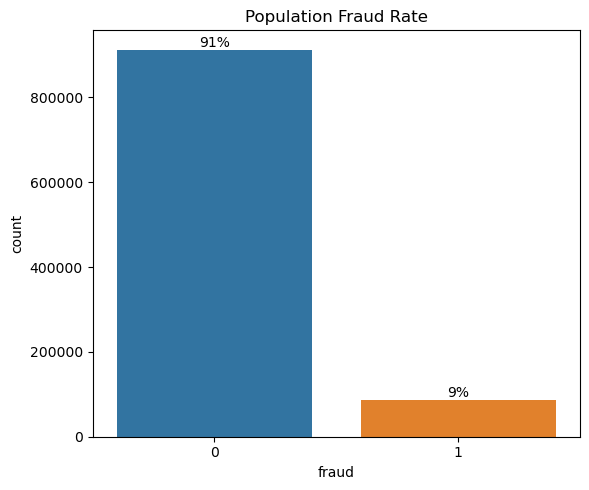

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))

ax = sns.countplot(data=df, x=df['fraud'], ax=ax)

# Add annotations
for c in ax.containers:
    labels=[ f'{x:.0%}' for x in (c.datavalues / df.fraud.count()) ]
    ax.bar_label(c, labels=labels, label_type='edge')

ax.set_xticklabels(['0', '1'])
ax.set_title('Population Fraud Rate')

plt.tight_layout()
plt.show()

In [ ]:
sampled_df['fraud'].value_counts()

0.0    91297
1.0     8703
Name: fraud, dtype: int64

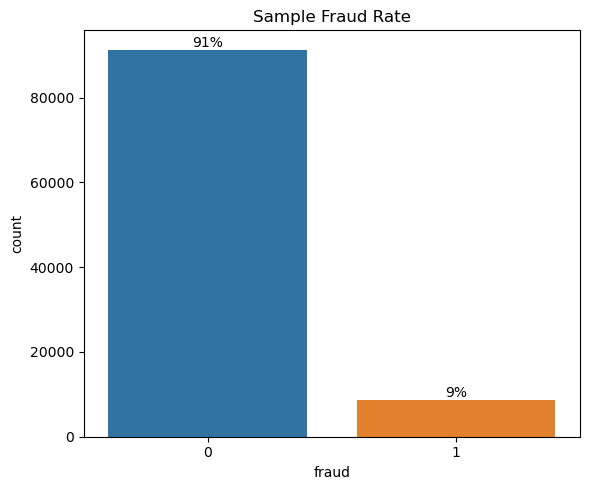

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))

ax = sns.countplot(data=sampled_df, x=sampled_df['fraud'], ax=ax)

# Add annotations
for c in ax.containers:
    labels=[ f'{x:.0%}' for x in (c.datavalues / sampled_df.fraud.count()) ]
    ax.bar_label(c, labels=labels, label_type='edge')

ax.set_xticklabels(['0', '1'])
ax.set_title('Sample Fraud Rate')

plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = sampled_df.select_dtypes(include='number').columns

# split the numeric_cols into discrete and continuous columns
discrete_threshold = 2

discrete_cols = [col for col in sampled_df.columns if sampled_df[col].nunique() <= discrete_threshold]
continuous_cols = [col for col in sampled_df.columns if sampled_df[col].nunique() > discrete_threshold]

print(discrete_cols)
print(continuous_cols)

['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']
['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']


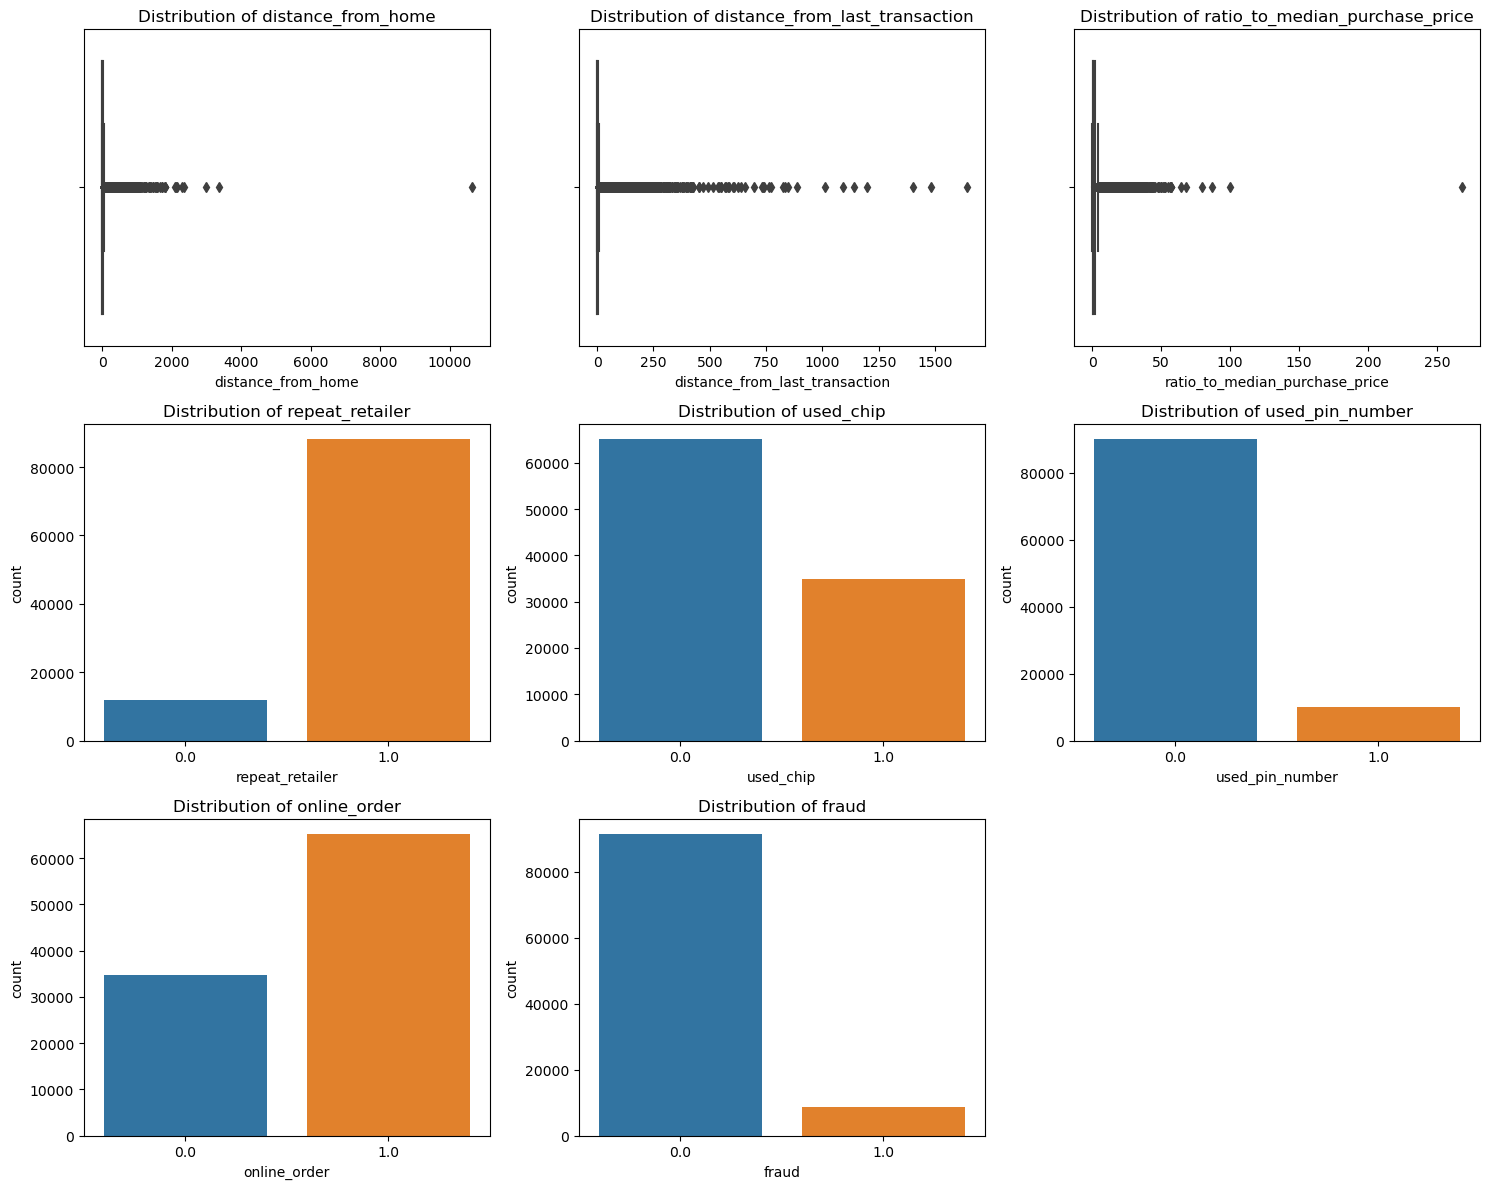

In [ ]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(sampled_df.columns, 1):
    plt.subplot(3, 3, i)
    if col in discrete_cols:
        sns.countplot(data=sampled_df, x=col)
        plt.title(f'Distribution of {col}')
    else:
        sns.boxplot(data=sampled_df, x=col)
        plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

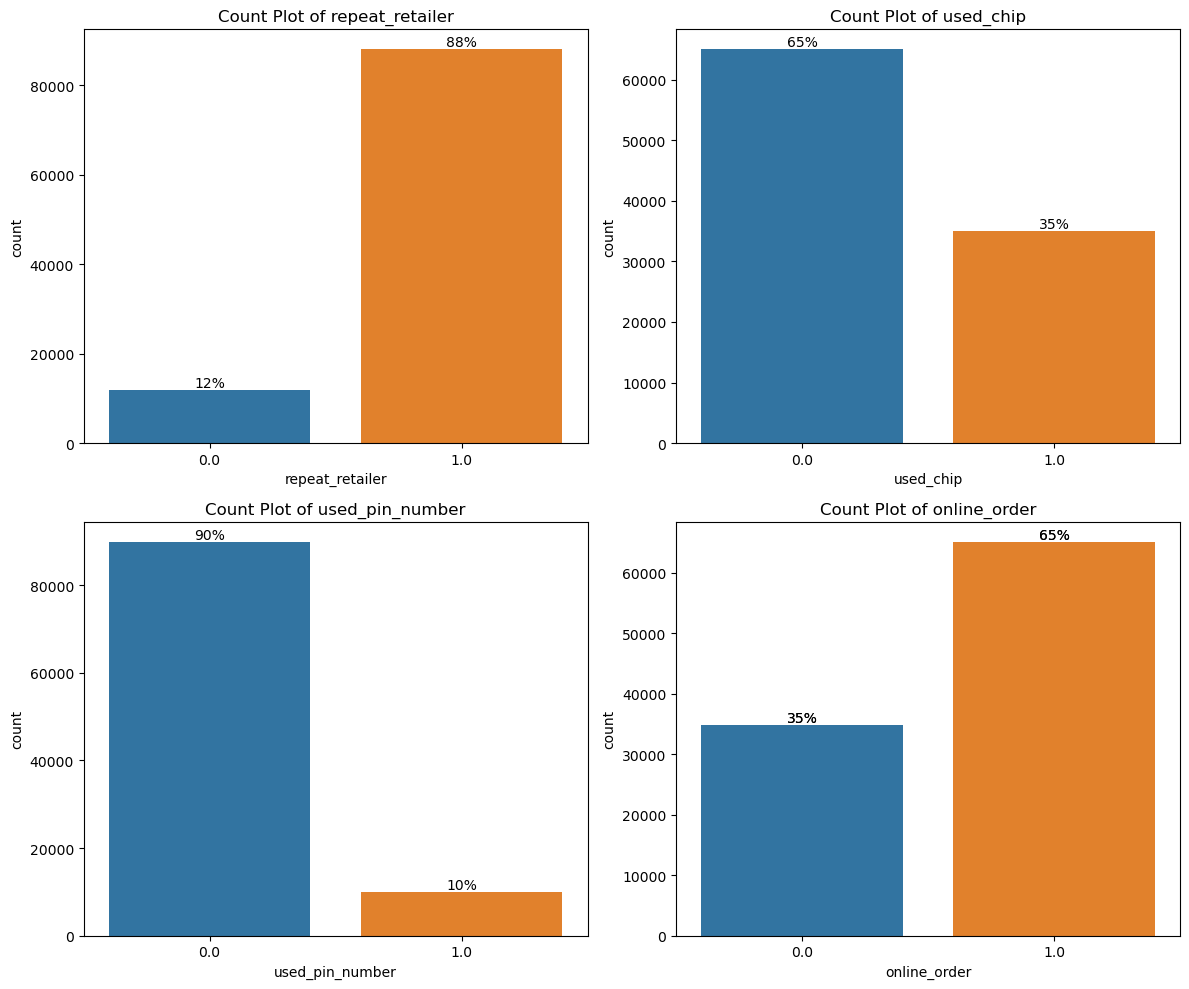

In [ ]:
# plot the discrete columns - count plot
plt.figure(figsize=(12, 10))

for i, col in enumerate(discrete_cols, 1):
    if col != 'fraud':
        plt.subplot(2, 2, i)
        ax = sns.countplot(x=col, data=sampled_df)
        plt.title(f'Count Plot of {col}')

    for c in ax.containers:
        labels=[ f'{x:.0%}' for x in (c.datavalues / len(sampled_df[col])) ]
        ax.bar_label(c, labels=labels, label_type='edge')

plt.tight_layout()
plt.show()

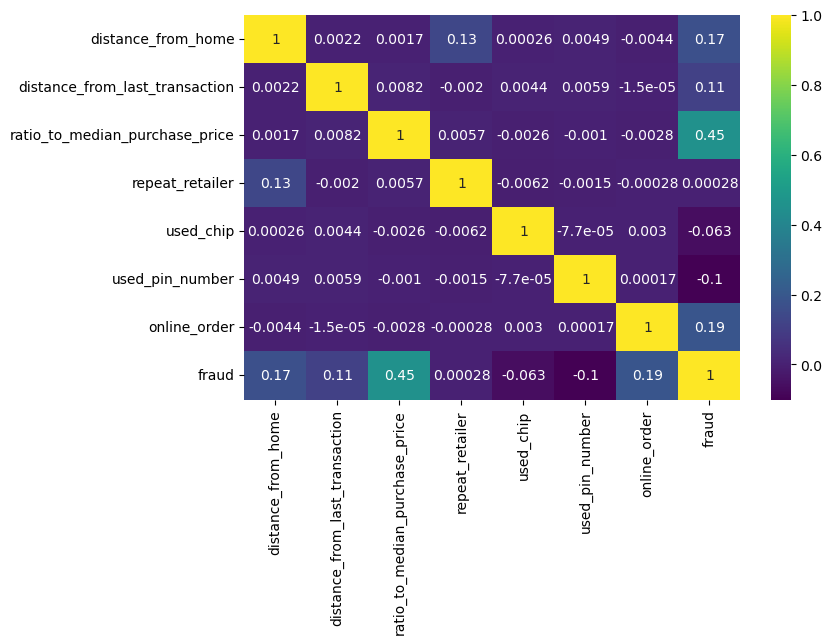

In [ ]:
plt.figure(figsize=(8, 5))

sns.heatmap(sampled_df.corr(), annot=True, cbar=True, cmap='viridis')
plt.show()

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [ ]:
# split the data into features & target
X = sampled_df.drop('fraud', axis=1)
y = sampled_df['fraud']

print(X.shape)
print(y.shape)

(100000, 7)
(100000,)


In [ ]:
# Original dataset shape
print('Original dataset shape %s' % Counter(y))

# Perform random over-sampling to deal with inbalanced classes
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0.0: 91297, 1.0: 8703})
Resampled dataset shape Counter({0.0: 91297, 1.0: 91297})


In [ ]:
# Convert y_res (which is a pandas Series) to a NumPy array
y_res = y_res.to_numpy()

# Reshape y_res to make it a column vector
y_res = y_res.reshape(-1, 1)

# Concatenate X_res and y_res horizontally
data = np.hstack((X_res, y_res))
data.shape

(182594, 8)

In [ ]:
# first, split the data into the training & test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

# then, scale the features - RobustScaler to deal with outliers
scaler = RobustScaler()

# scale the continuous columns:
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols] )


# Flatten or reshape y_train and y_test
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(122337, 7)
(122337,)
(60257, 7)
(60257,)


In [ ]:
# Models

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier




# Metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import RepeatedKFold, KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
# Define a function to train the models with default settings
def get_model(X_train, y_train, X_test, y_test, model_type):

    if model_type == 'logistic_regression':
        model = LogisticRegression()
    elif model_type == 'naive_bayes':
        model = GaussianNB()
    elif model_type == 'kn_classifier':
        model = KNeighborsClassifier()
    elif model_type == 'decision_tree':
        model = DecisionTreeClassifier()
    elif model_type == 'random_forest':
        model = RandomForestClassifier()
    else:
        raise ValueError('Invalid model type')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # calculate the accuracies
    acc_test = accuracy_score(y_test, y_pred)
    acc_train = model.score(X_train, y_train)

    # print the accuracies
    print(f'Test Accuracy for {model_type}: {acc_test:.3f}')
    print(f'Train Accuracy for {model_type}: {acc_train:.3f}')
    print()

    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix for {model_type}:\n', cm)
    print()

    print(f'Classification Report for {model_type}:\n', classification_report(y_test, y_pred))
    # print the first 10 predictions
    # print(f'Predictions for {model_type} (show first 10):\n', model.predict(X_test)[:10])
    # print()

    # cross validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print('Cross Validation scores:\n', cv_scores)
    print(f'Mean Score of {cv_scores.mean():.2f} with a standard deviation of {cv_scores.std():.2f}')

    return model, acc_test, acc_train

In [ ]:
model_log = get_model(X_train, y_train, X_test, y_test, 'logistic_regression')

Test Accuracy for logistic_regression: 0.943
Train Accuracy for logistic_regression: 0.943

Confusion Matrix for logistic_regression:
 [[28042  1983]
 [ 1453 28779]]

Classification Report for logistic_regression:
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     30025
         1.0       0.94      0.95      0.94     30232

    accuracy                           0.94     60257
   macro avg       0.94      0.94      0.94     60257
weighted avg       0.94      0.94      0.94     60257

Cross Validation scores:
 [0.94302763 0.94045284 0.94278007 0.94404708 0.94200351]
Mean Score of 0.94 with a standard deviation of 0.00


In [ ]:
model_types = ['logistic_regression', 'naive_bayes', 'kn_classifier', 'decision_tree',
               'random_forest', 'ada_boost', 'gradient_boost', 'lda', 'hist_boost']

results = {'Model': [],
           'Test Accuracy': [],
           'Train Accuracy': []}

for model_type in model_types:
    print(f'Model - {model_type}: ')
    print()

    model, acc_test, acc_train = get_model(X_train, y_train, X_test, y_test, model_type)
    results['Model'].append(model_type.capitalize())
    results['Test Accuracy'].append(acc_test)
    results['Train Accuracy'].append(acc_train)
    print('----------------------------------')
    print()

Model - logistic_regression: 

Test Accuracy for logistic_regression: 0.943
Train Accuracy for logistic_regression: 0.943

Confusion Matrix for logistic_regression:
 [[28042  1983]
 [ 1453 28779]]

Classification Report for logistic_regression:
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     30025
         1.0       0.94      0.95      0.94     30232

    accuracy                           0.94     60257
   macro avg       0.94      0.94      0.94     60257
weighted avg       0.94      0.94      0.94     60257

Cross Validation scores:
 [0.94302763 0.94045284 0.94278007 0.94404708 0.94200351]
Mean Score of 0.94 with a standard deviation of 0.00
----------------------------------

Model - naive_bayes: 

Test Accuracy for naive_bayes: 0.947
Train Accuracy for naive_bayes: 0.948

Confusion Matrix for naive_bayes:
 [[27866  2159]
 [ 1031 29201]]

Classification Report for naive_bayes:
               precision    recall  f1-score   sup

In [ ]:
results_df = pd.DataFrame(results).sort_values(by='Test Accuracy', ascending=False)
print(results_df)

                 Model  Test Accuracy  Train Accuracy
4        Random_forest       0.999967        1.000000
3        Decision_tree       0.999917        1.000000
8           Hist_boost       0.999917        1.000000
5            Ada_boost       0.999751        0.999869
6       Gradient_boost       0.997743        0.997613
2        Kn_classifier       0.992914        0.995472
1          Naive_bayes       0.947060        0.947571
0  Logistic_regression       0.942978        0.942634
7                  Lda       0.916358        0.916959
